In [160]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd

## Creating the function for extracting data.

In [161]:
num_points = 100
dx = 2/num_points
x_loc = np.linspace(-1,1,num_points)
y_loc_init = -np.sin(1*np.pi*x_loc) - np.sin(2*np.pi*x_loc) + np.sin(3*np.pi*x_loc) 
y_loc_init = y_loc_init/(np.max(np.abs(y_loc_init)))
y_loc = y_loc_init.copy()
mu = 0.01

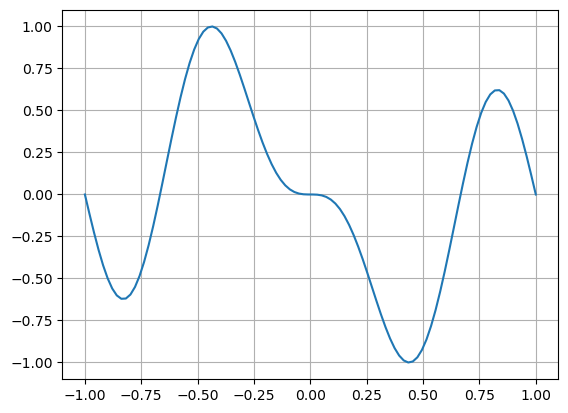

In [162]:
plt.plot(x_loc,y_loc)
plt.grid()

In [163]:
dt = 1/1000
fin_time = 0.5
time_iter = int (fin_time/dt)
time_loc = np.linspace(0,fin_time,time_iter)

Y_rec = np.zeros((time_iter,len(x_loc)))

In [164]:
#Y_rec = np.append(Y_rec,[y_loc], axis=0)

In [165]:
for i in range(len(time_loc)):
    temp_y = y_loc.copy()
    dy_dx = np.zeros(num_points)
    d2y_dx = np.zeros(num_points)

    dy_dx[1:-1] = (temp_y[1:-1] - temp_y[:-2])/dx
    dy_dx[0] = (temp_y[0] - temp_y[-2])/dx
    dy_dx[-1] = (temp_y[-1] - temp_y[-2])/dx

    d2y_dx[1:-1] = (temp_y[:-2] - 2*temp_y[1:-1] + temp_y[2:]) / dx**2
    d2y_dx[0] = (temp_y[1] - 2*temp_y[0] + temp_y[-2]) / dx**2
    dy_dx[-1] = (temp_y[1] - 2*temp_y[-1] + temp_y[-2]) / dx**2

    #for j in range(num_points):
    #    dy_dx[j] = (temp_y[(j+1)%num_points] -temp_y[(j-1)%num_points])/(dx)
    #
    #for k in range(num_points):
    #    d2y_dx[k] = (temp_y[(k+1)%num_points] -2*temp_y[k] + temp_y[(k+1)%num_points])/dx**2

    dy = dt*(mu*d2y_dx - y_loc*dy_dx)
    y_loc = y_loc + dy
    #y_loc[0] = 0
    Y_rec[i,:] = y_loc

C:\Users\dell\AppData\Local\Temp\ipykernel_2392\1149977137.py:20: RuntimeWarning: overflow encountered in multiply
  dy = dt*(mu*d2y_dx - y_loc*dy_dx)
C:\Users\dell\AppData\Local\Temp\ipykernel_2392\1149977137.py:20: RuntimeWarning: invalid value encountered in subtract
  dy = dt*(mu*d2y_dx - y_loc*dy_dx)
C:\Users\dell\AppData\Local\Temp\ipykernel_2392\1149977137.py:6: RuntimeWarning: invalid value encountered in subtract
  dy_dx[1:-1] = (temp_y[1:-1] - temp_y[:-2])/dx
C:\Users\dell\AppData\Local\Temp\ipykernel_2392\1149977137.py:10: RuntimeWarning: invalid value encountered in subtract
  d2y_dx[1:-1] = (temp_y[:-2] - 2*temp_y[1:-1] + temp_y[2:]) / dx**2
C:\Users\dell\AppData\Local\Temp\ipykernel_2392\1149977137.py:11: RuntimeWarning: invalid value encountered in scalar subtract
  d2y_dx[0] = (temp_y[1] - 2*temp_y[0] + temp_y[-2]) / dx**2
C:\Users\dell\AppData\Local\Temp\ipykernel_2392\1149977137.py:12: RuntimeWarning: invalid value encountered in scalar subtract
  dy_dx[-1] = (temp_y[

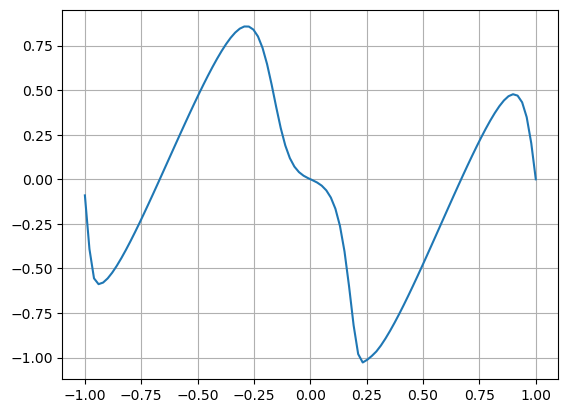

In [166]:
max_iter = 190
plt.plot(x_loc,Y_rec[max_iter,:])
plt.grid()

In [167]:
df = pd.DataFrame()

In [168]:
df["Time"] = time_loc
df

,Time
0,0.000000
1,0.001002
2,0.002004
3,0.003006
4,0.004008
...,...
495,0.495992
496,0.496994
497,0.497996
498,0.498998


In [169]:
temp_df = pd.DataFrame(Y_rec)
temp_df2 = pd.DataFrame(x_loc).T
temp_df2 = pd.concat([temp_df2]*len(time_loc),ignore_index=True)
temp_df3 = pd.DataFrame(y_loc_init).T
temp_df3 = pd.concat([temp_df3]*len(time_loc),ignore_index=True)
temp_df3

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-2.232405e-16,-0.115034,-0.226139,-0.329512,-0.421603,-0.499223,-0.559652,-0.600719,-0.620877,-0.619244,...,0.619244,0.620877,0.600719,0.559652,0.499223,0.421603,0.329512,0.226139,0.115034,2.232405e-16
1,-2.232405e-16,-0.115034,-0.226139,-0.329512,-0.421603,-0.499223,-0.559652,-0.600719,-0.620877,-0.619244,...,0.619244,0.620877,0.600719,0.559652,0.499223,0.421603,0.329512,0.226139,0.115034,2.232405e-16
2,-2.232405e-16,-0.115034,-0.226139,-0.329512,-0.421603,-0.499223,-0.559652,-0.600719,-0.620877,-0.619244,...,0.619244,0.620877,0.600719,0.559652,0.499223,0.421603,0.329512,0.226139,0.115034,2.232405e-16
3,-2.232405e-16,-0.115034,-0.226139,-0.329512,-0.421603,-0.499223,-0.559652,-0.600719,-0.620877,-0.619244,...,0.619244,0.620877,0.600719,0.559652,0.499223,0.421603,0.329512,0.226139,0.115034,2.232405e-16
4,-2.232405e-16,-0.115034,-0.226139,-0.329512,-0.421603,-0.499223,-0.559652,-0.600719,-0.620877,-0.619244,...,0.619244,0.620877,0.600719,0.559652,0.499223,0.421603,0.329512,0.226139,0.115034,2.232405e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-2.232405e-16,-0.115034,-0.226139,-0.329512,-0.421603,-0.499223,-0.559652,-0.600719,-0.620877,-0.619244,...,0.619244,0.620877,0.600719,0.559652,0.499223,0.421603,0.329512,0.226139,0.115034,2.232405e-16
496,-2.232405e-16,-0.115034,-0.226139,-0.329512,-0.421603,-0.499223,-0.559652,-0.600719,-0.620877,-0.619244,...,0.619244,0.620877,0.600719,0.559652,0.499223,0.421603,0.329512,0.226139,0.115034,2.232405e-16
497,-2.232405e-16,-0.115034,-0.226139,-0.329512,-0.421603,-0.499223,-0.559652,-0.600719,-0.620877,-0.619244,...,0.619244,0.620877,0.600719,0.559652,0.499223,0.421603,0.329512,0.226139,0.115034,2.232405e-16
498,-2.232405e-16,-0.115034,-0.226139,-0.329512,-0.421603,-0.499223,-0.559652,-0.600719,-0.620877,-0.619244,...,0.619244,0.620877,0.600719,0.559652,0.499223,0.421603,0.329512,0.226139,0.115034,2.232405e-16


In [170]:
result = pd.concat([temp_df2,temp_df3,df,temp_df],axis=1,ignore_index=True)
#result = pd.concat([result,temp_df],axis=1)
result = result.head(max_iter)
result

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,0.617963,0.620282,0.600802,0.560317,0.500302,0.422878,0.330748,0.227114,0.115575,2.232405e-16
1,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,0.616668,0.619665,0.600862,0.560963,0.501368,0.424147,0.331984,0.228093,0.116118,2.232532e-16
2,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,0.615358,0.619027,0.600899,0.561589,0.502421,0.425411,0.333220,0.229076,0.116665,2.232795e-16
3,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,0.614034,0.618368,0.600914,0.562197,0.503462,0.426670,0.334457,0.230062,0.117214,2.233208e-16
4,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,0.612697,0.617690,0.600907,0.562785,0.504489,0.427922,0.335695,0.231052,0.117766,2.233782e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,0.376522,0.414867,0.446953,0.470297,0.480906,0.472189,0.433434,0.348970,0.202925,6.714037e-08
186,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,0.375597,0.413915,0.446017,0.469430,0.480168,0.471644,0.433131,0.348904,0.202985,9.664451e-08
187,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,0.374675,0.412967,0.445084,0.468563,0.479428,0.471095,0.432822,0.348831,0.203039,1.396914e-07
188,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,0.373757,0.412022,0.444154,0.467698,0.478688,0.470543,0.432507,0.348751,0.203088,2.027502e-07


In [171]:
Final_df = pd.DataFrame(columns=range(num_points+3))
y_frame = pd.DataFrame(y_loc_init)

Final_df

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102


In [172]:
x_loc[10]

-0.797979797979798

In [173]:
import numpy as np
import pandas as pd

# Initialize an empty list to collect rows
data = []

y_frame = np.array([y_loc_init])  # Convert y_loc_init to a 2D numpy array

for i in range(max_iter):
    for j in range(num_points):
        # Convert each array to 2D (if not already)
        x_loc_arr = np.array([x_loc[j]]).reshape(1, -1)  # Reshape to 2D
        time_loc_arr = np.array([time_loc[i]]).reshape(1, -1)  # Reshape to 2D
        Y_rec_arr = np.array([Y_rec[i][j]]).reshape(1, -1)  # Reshape to 2D
        
        # Concatenate along columns (axis=1)
        row = np.concatenate([y_frame, x_loc_arr, time_loc_arr, Y_rec_arr], axis=1).flatten()
        
        # Append the 1D row to the list
        data.append(row)
    
    print(i)

# Convert the list of 1D arrays (rows) to a 2D numpy array
Final_array = np.array(data)

# Finally, convert the numpy array to a pandas DataFrame
Final_df = pd.DataFrame(Final_array)

print(Final_df)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
                0         1         2         3         4         5    \
0     -2.232405e-16 -0.115034 -0.226139 -0.329512 -0.421603 -0.499223   
1     -2.232405e-16 -0.115034 -0.226139 -0.329512 -0.421603 -0.499223   
2     -2.232405e-16 -0.115034 -0.226139 -0.329512 -0.421603 -0.499223   
3     -2.232405e-16 -0.115034 -0.226139 -0.329512 -0.42160

In [174]:
Final_df.to_csv('minus_sin_1_pi_minus_sin_2_pi_plus_sin_3_pi.csv')